LUT -> Look Up Table <br>
https://www.pyimagesearch.com/2015/10/05/opencv-gamma-correction/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image
from collections import defaultdict

In [2]:
def create_table(gamma):
    return np.array([((i / 255.0) ** gamma) * 255
                    for i in np.arange(0, 256)]).astype('uint8')

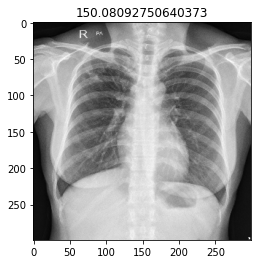

In [41]:
# file_path = 'n_dir2/train_dir/Tuberculosis/CHNCXR_0522_1.png' 127
# file_path = 'n_dir2/train_dir/Tuberculosis/CHNCXR_0654_1.png'
# file_path = 'n_dir2/train_dir/Tuberculosis/CHNCXR_0449_1.png'
# file_path = 'n_dir2/train_dir/Tuberculosis/CHNCXR_0527_1.png'

# file_path = 'n_dir2/train_dir/Tuberculosis/MCUCXR_0203_1.png' 134
# file_path = 'n_dir2/train_dir/Tuberculosis/CHNCXR_0551_1.png'

# file_path = 'n_dir2/train_dir/Tuberculosis/CHNCXR_0517_1.png' # 131
# file_path = 'n_dir2/train_dir/Tuberculosis/CHNCXR_0561_1.png'

# file_path = 'n_dir2/train_dir/Tuberculosis/CHNCXR_0545_1.png' # 127
# file_path = 'n_dir2/train_dir/Tuberculosis/MCUCXR_0387_1.png'

# file_path = 'n_dir2/train_dir/Tuberculosis/CHNCXR_0449_1.png' # 153
# file_path = 'n_dir2/train_dir/Tuberculosis/CHNCXR_0386_1.png'

# file_path = 'n_dir2/train_dir/Tuberculosis/CHNCXR_0577_1.png' # 147
file_path = 'n_dir2/train_dir/Tuberculosis/CHNCXR_0623_1.png'

# file_path = 'n_dir2/train_dir/Tuberculosis/CHNCXR_0494_1.png' # 147
# file_path = 'n_dir2/train_dir/Tuberculosis/CHNCXR_0514_1.png'

im = np.array(Image.fromarray(cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)).resize((299, 299), Image.ANTIALIAS))
plt.title(im.mean())
plt.imshow(im, cmap='gray')

1.2


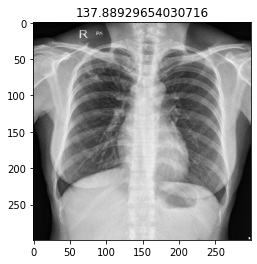

In [42]:
# gamma = 2.5
# gamma = 2
# gamma = 1.7
gamma = 1.2  # for 150-153
# gamma = 1.1 # for 147
# gamma = 0.9  # for 134-131
# gamma = 0.8   # for 127
# gamma = 0.7
# gamma = 0.5

iml = cv2.LUT(im, create_table(gamma))
plt.title(iml.mean())
plt.imshow(iml, cmap='gray')
print(gamma)

In [33]:
# imlb = (iml > 100) * iml
# plt.title(imlb.mean())
# plt.imshow(imlb, cmap='gray')

In [193]:
################################

In [45]:
def mean_std(gamma, img_path):
    im = cv2.imread(img_path)
    iml = cv2.LUT(im, create_table(gamma))
    return iml.mean()

In [115]:
# folder = 'base_dir/train_dir/Normal/'
# folder = 'base_dir/train_dir/Tuberculosis/'
# folder = 'normalize_dir/train_dir/Tuberculosis/'
# folder = 'normalize_dir/train_dir/Normal/'
# folder = 'radiographs_n3/'
# folder = 'n_dir2/val_dir/Normal/'
# folder = 'radiographs_n2/'
# folder = 'radiographs_normalize/'
# folder = 'fct299_normalize/'
# folder = 'inf299_n3/'
folder = 'fct299_n3/'
# folder = 'inf299_normalize/'
files = [f for f in os.listdir(folder) if 'png' in f or 'jpg' in f]

In [116]:
means = defaultdict(list)
for f in files:
    mean = mean_std(1, folder+f)
    means[int(mean)].append(f)

In [117]:
meanslen = {}
for m in means:
    meanslen[m] = len(means[m])

In [118]:
# means

In [119]:
# sorted(meanslen.items(), key=lambda x: x[1], reverse=True)

In [120]:
freq = []
for m in meanslen:
    for i in range(meanslen[m]):
        freq.append(m)

In [121]:
nfreq = np.array(freq)

In [122]:
nfreq.mean()

141.4

In [123]:
nfreq.std()

1.9078784028338913

In [124]:
nfreq.min()

139

In [125]:
nfreq.max()

144